Step 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df = df.drop(columns=['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

In [5]:
df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250


In [6]:
df.isna()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
886,False,False,False,False,False,False
887,False,False,False,False,False,False
888,False,False,True,False,False,False
889,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [8]:
df = df.drop(columns=['Age'])
df.head(3)

,Survived,Pclass,SibSp,Parch,Fare
0,0,3,1,0,7.2500
1,1,1,1,0,71.2833
2,1,3,0,0,7.9250


In [9]:
x=df.drop(columns=['Survived'])
y=df['Survived']

Step 2 EDA

In [10]:
df.describe().loc[['mean', 'std']]

,Survived,Pclass,SibSp,Parch,Fare
mean,0.383838,2.308642,0.523008,0.381594,32.204208
std,0.486592,0.836071,1.102743,0.806057,49.693429


In [11]:
df.shape

(891, 5)

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

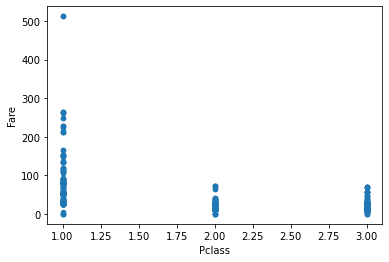

In [15]:
df.plot('Pclass', 'Fare', kind='scatter')

<AxesSubplot:>

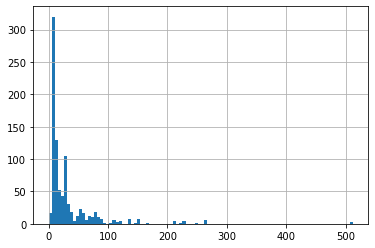

In [13]:
df.Fare.hist(bins=100)

Step 3 Modeling

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
# reserve 20% dataset as testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [19]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [20]:
model=LogisticRegression(random_state=0)


In [21]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
logit_reg_coef = pd.DataFrame(model.coef_[0],index=X_train.columns,columns=['coefficient'])
logit_reg_coef.transpose()

,Pclass,SibSp,Parch,Fare
coefficient,-0.78433,-0.16015,0.36307,0.00375


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model=DecisionTreeClassifier(max_depth=2, random_state=0)

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [34]:
from sklearn import tree

[Text(167.4, 181.2, 'Pclass <= 2.5\ngini = 0.47\nsamples = 712\nvalue = [443, 269]'),
 Text(83.7, 108.72, 'Fare <= 13.681\ngini = 0.492\nsamples = 324\nvalue = [142, 182]'),
 Text(41.85, 36.23999999999998, 'gini = 0.444\nsamples = 75\nvalue = [50, 25]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.466\nsamples = 249\nvalue = [92, 157]'),
 Text(251.10000000000002, 108.72, 'SibSp <= 2.5\ngini = 0.348\nsamples = 388\nvalue = [301, 87]'),
 Text(209.25, 36.23999999999998, 'gini = 0.361\nsamples = 359\nvalue = [274, 85]'),
 Text(292.95, 36.23999999999998, 'gini = 0.128\nsamples = 29\nvalue = [27, 2]')]

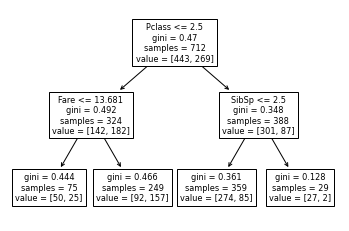

In [36]:
tree.plot_tree(model, feature_names=x.columns)

Step 4 Evaluation

In [37]:
y_predict = model.predict(X_test)

In [38]:
y_predict

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict).round(4)

0.676

In [40]:
from sklearn.metrics import confusion_matrix
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

The confusion matrix is:
[[85 21]
 [37 36]]
